### 4.13 다변량 선형 회귀 분석 - 데이터 확보하기

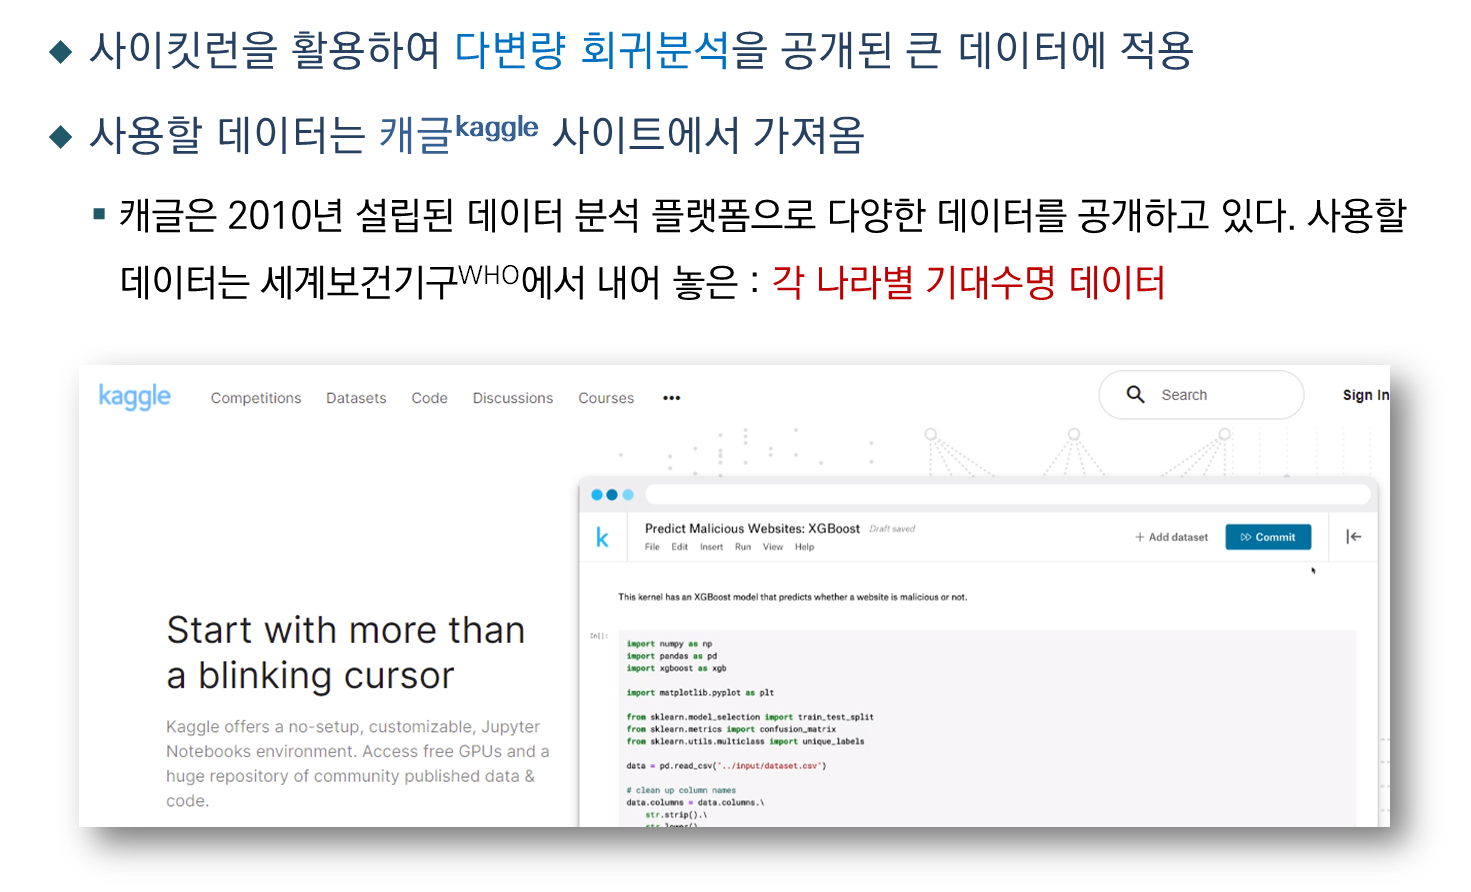

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

life = pd.read_csv('../data/life_expectancy.csv')
life

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [2]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# 특정 열만 선택하여 새로운 데이터 프레임 생성
life = life[['Life expectancy', 'Year', 'Alcohol',
           'Percentage expenditure', 'Total expenditure',
           'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP',
           'Thinness 1-19 years', 'Thinness 5-9 years']]
life

,Life expectancy,Year,Alcohol,Percentage expenditure,Total expenditure,Hepatitis B,Measles,Polio,BMI,GDP,Thinness 1-19 years,Thinness 5-9 years
0,65.0,2015,0.01,71.279624,8.16,65.0,1154,6.0,19.1,584.259210,17.2,17.3
1,59.9,2014,0.01,73.523582,8.18,62.0,492,58.0,18.6,612.696514,17.5,17.5
2,59.9,2013,0.01,73.219243,8.13,64.0,430,62.0,18.1,631.744976,17.7,17.7
3,59.5,2012,0.01,78.184215,8.52,67.0,2787,67.0,17.6,669.959000,17.9,18.0
4,59.2,2011,0.01,7.097109,7.87,68.0,3013,68.0,17.2,63.537231,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,2004,4.36,0.000000,7.13,68.0,31,67.0,27.1,454.366654,9.4,9.4
2934,44.5,2003,4.06,0.000000,6.52,7.0,998,7.0,26.7,453.351155,9.8,9.9
2935,44.8,2002,4.43,0.000000,6.53,73.0,304,73.0,26.3,57.348340,1.2,1.3
2936,45.3,2001,1.72,0.000000,6.16,76.0,529,76.0,25.9,548.587312,1.6,1.7


크기는 shape 속성으로 알 수 있고, 결손값은 isnull() 함수를 이용
결손값이 있는 데이터는 모두 삭제  

In [3]:
print(life.shape)
print(life.isnull().sum())

(2938, 12)
Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64


### 4.14 다변량 선형 회귀 분석 - 예측에 필요한 데이터를 추려 보자

In [4]:
life.dropna(inplace = True)
print(life.shape)

(1853, 12)


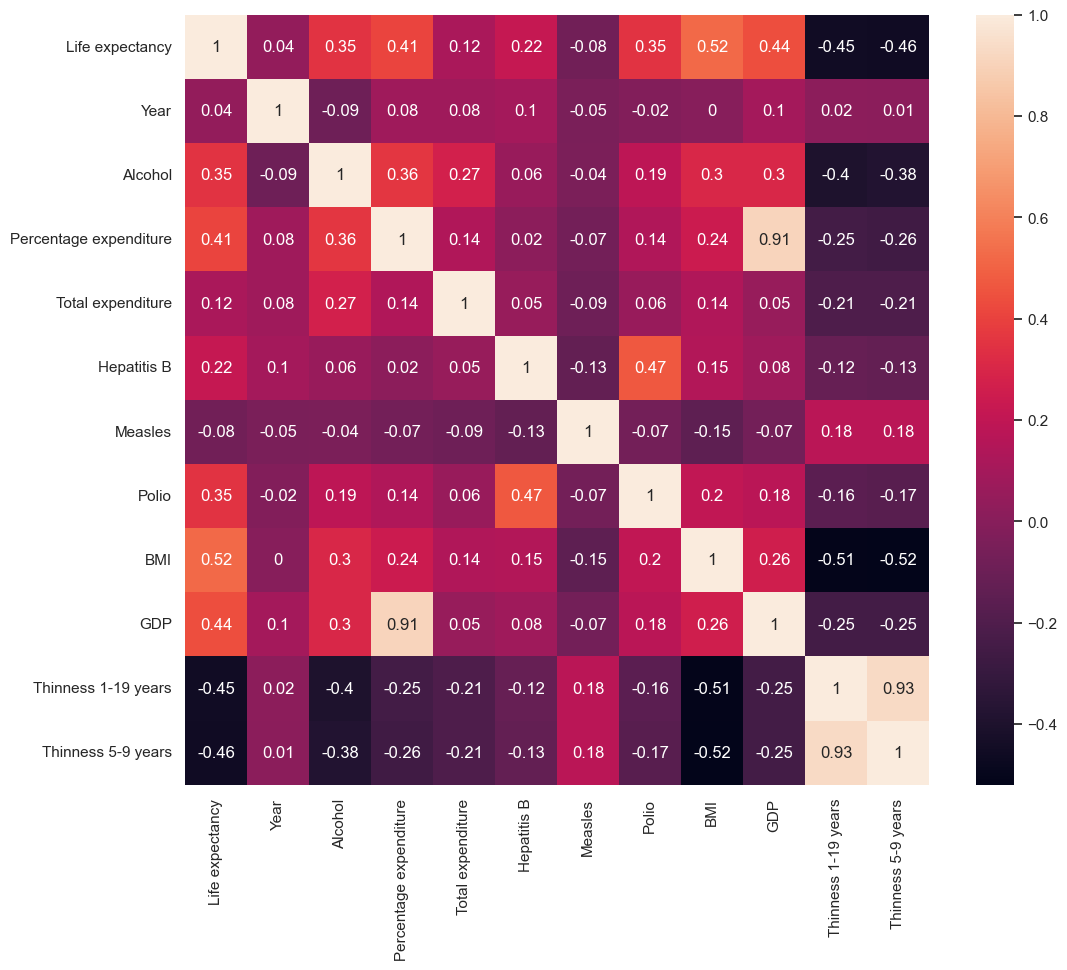

In [5]:
# sns.set(rc={'figure.figsize':(12,10)})    # 상관행렬 가시
sns.set_theme(rc={'figure.figsize':(12,10)})    # 상관행렬 가시

## 상관행렬을 그리기 위해 숫자형 데이터만 추출
numeric_life = life.select_dtypes(include=[float, int])

correlation_matrix = numeric_life.corr().round(2) # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()  # colab 등 노트북 환경에서는 필요없지만, 콘솔 환경 등에서는 필요

### 4.15 다변량 선형 회귀 분석 - 쌍 그림으로 확인하고 중요 특징만 추출

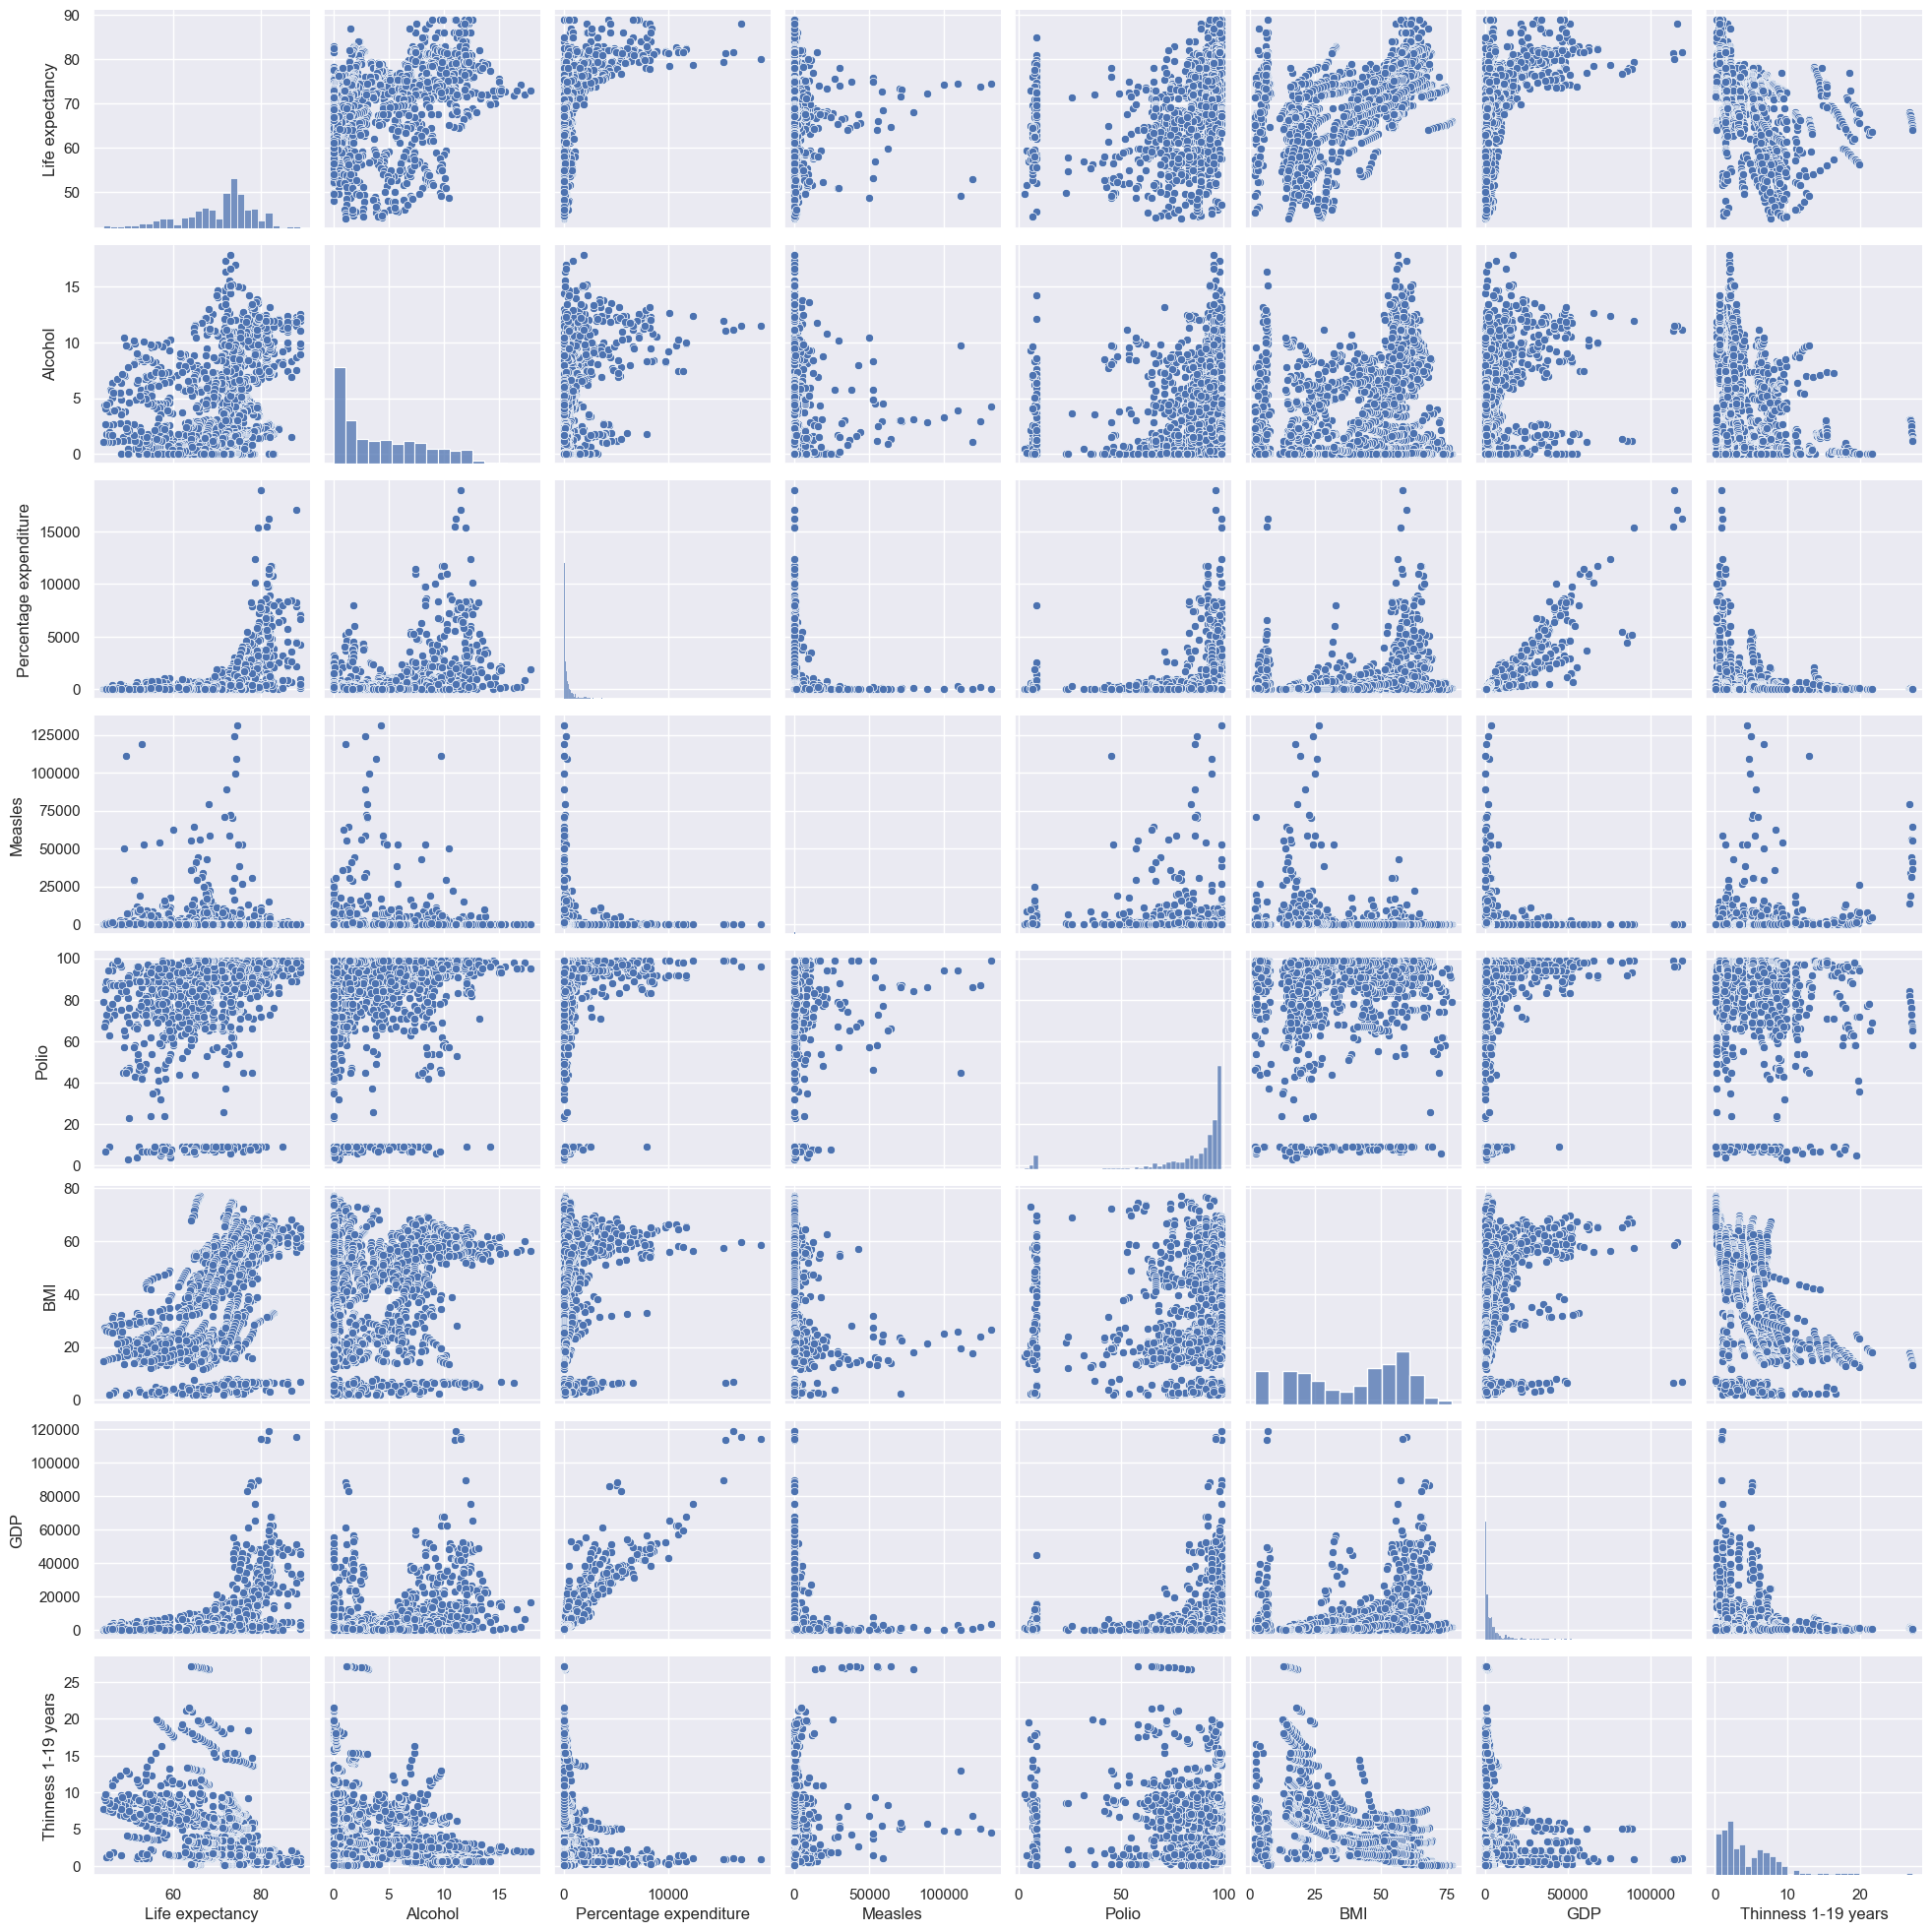

In [6]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()  # colab 등 노트북 환경에서는 필요없지만, 콘솔 환경 등에서는 필요

In [7]:
X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']
# print(X)
print(y)
X

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 1853, dtype: float64


,Alcohol,Percentage expenditure,Polio,BMI,GDP,Thinness 1-19 years
0,0.01,71.279624,6.0,19.1,584.259210,17.2
1,0.01,73.523582,58.0,18.6,612.696514,17.5
2,0.01,73.219243,62.0,18.1,631.744976,17.7
3,0.01,78.184215,67.0,17.6,669.959000,17.9
4,0.01,7.097109,68.0,17.2,63.537231,18.2
...,...,...,...,...,...,...
2933,4.36,0.000000,67.0,27.1,454.366654,9.4
2934,4.06,0.000000,7.0,26.7,453.351155,9.8
2935,4.43,0.000000,73.0,26.3,57.348340,1.2
2936,1.72,0.000000,76.0,25.9,548.587312,1.6


### 4.16 다변량 선형 회귀 분석 - 데이터를 훈련용과 검증용으로 분리해 학습

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.dropna(inplace = True)

X = life[['Alcohol', 'Percentage expenditure', 'Polio',
         'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
lin_model.coef_ # 뢰귀계수 (기울기) : W 값들

array([ 1.68886919e-01, -2.19213360e-04,  6.56347945e-02,  1.51157524e-01,
        2.15625622e-04, -2.61141802e-01])

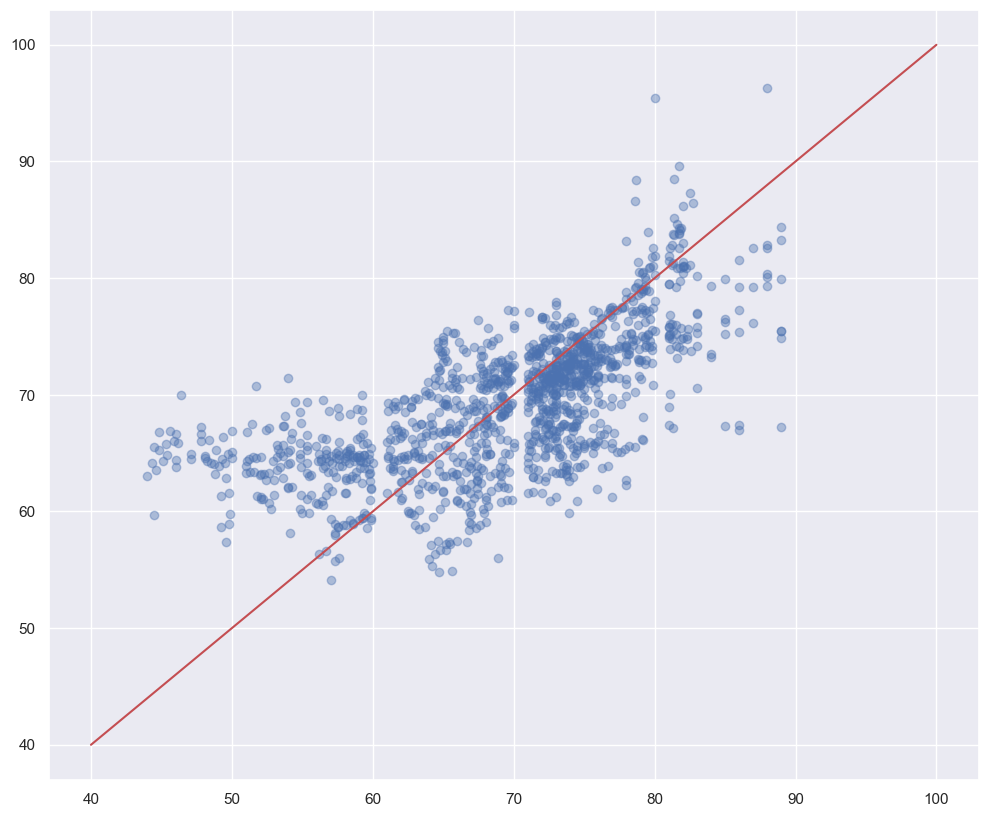

In [19]:
y_hat_train = lin_model.predict(X_train)

plt.scatter(y_train, y_hat_train, alpha=0.4)  # 검증 데이터와 예측 데이터의 산포도
xy_range = [40, 100]
plt.plot(xy_range, xy_range, "r")     # (40,40)에서 (10,100)으로 직선
                                 #   - 데이터가 이 직선과 일치할수록 예측이 정확
plt.show()
                                 

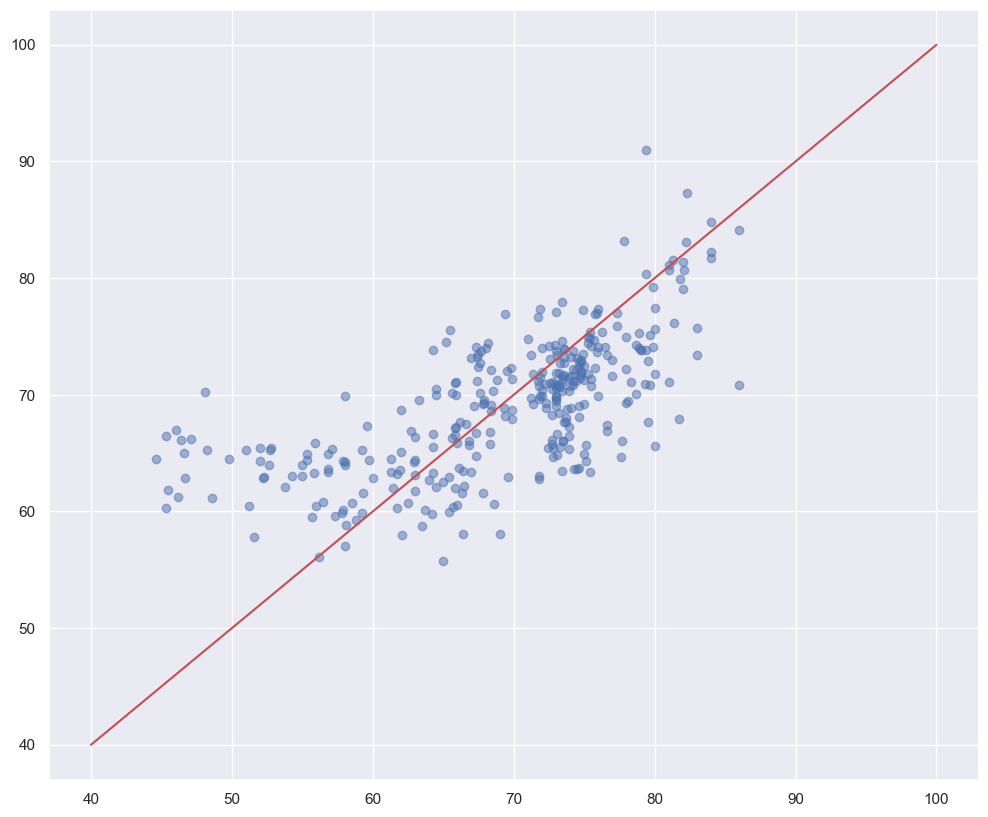

In [20]:
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.plot(xy_range, xy_range, "r")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

Mean squared error: 42.90010998713035


In [22]:
lin_model.score(X_train, y_train), lin_model.score(X_test, y_test)

(0.4482070444720391, 0.4493329662207387)

In [23]:
## mean squared error 계산 (위의 함수의 결과와 일치)
((y_test - y_hat_test)**2).mean()

42.90010998713035

##  5-1 텐서플로에서 실행하는 단순 선형회귀

Epoch 1/2000


c:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 6995.9238
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1864.7107
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1105.6887
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 988.8672
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 966.4036
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 957.8330
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 951.3371
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 945.1799
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 939.1061
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 933.0780
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 927.0899
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 921.1407
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 915.2301
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 909.3578
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step 

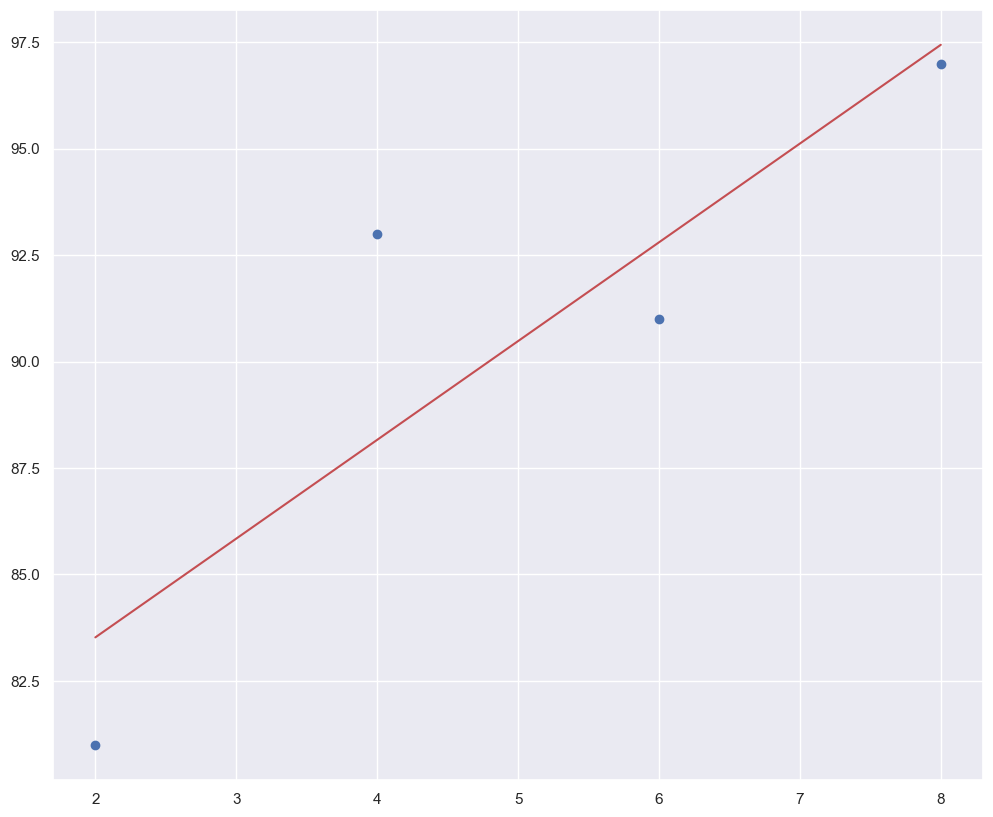

In [25]:
#######################################################
# [tf + keras] 단순선형회귀 : 공부시간 예제
#######################################################
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

X = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다. 
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다. 
# model.compile(optimizer='sgd', loss='mse')
model.compile(optimizer=SGD(learning_rate=0.01), loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
history = model.fit(X, y, epochs=2000)

plt.scatter(X, y)
plt.plot(X, model.predict(X),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

In [26]:
#임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7.0  # float로 넣어 주어야 함 (최근 버전)
prediction = model.predict(np.array([[hour]]))  # 반드시 2차원 array로 넣어 주어야 함

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
7시간을 공부할 경우의 예상 점수는 95.12점입니다


In [27]:
hour, prediction

(7.0, array([[95.120026]], dtype=float32))

In [28]:
model.get_weights()

[array([[2.3193967]], dtype=float32), array([78.88425], dtype=float32)]

In [29]:
history.history

{'loss': [6995.923828125,
  1864.710693359375,
  1105.688720703125,
  988.8672485351562,
  966.4036254882812,
  957.8330078125,
  951.3370971679688,
  945.1798706054688,
  939.1061401367188,
  933.0780029296875,
  927.0899047851562,
  921.1406860351562,
  915.2301025390625,
  909.3577880859375,
  903.5233154296875,
  897.7267456054688,
  891.9676513671875,
  886.2459106445312,
  880.5612182617188,
  874.9132690429688,
  869.302001953125,
  863.7269287109375,
  858.18798828125,
  852.68505859375,
  847.2175903320312,
  841.7855224609375,
  836.3887939453125,
  831.02685546875,
  825.69970703125,
  820.406982421875,
  815.1487426757812,
  809.9242553710938,
  804.7337646484375,
  799.5767822265625,
  794.4532470703125,
  789.3629150390625,
  784.305419921875,
  779.2808837890625,
  774.288818359375,
  769.328857421875,
  764.4012451171875,
  759.5054931640625,
  754.641357421875,
  749.808837890625,
  745.007568359375,
  740.2373657226562,
  735.4981079101562,
  730.7894287109375,
  726.

## 5-2 텐서플로에서 실행하는 다중 선형회귀 모델

In [30]:
#######################################################
# [tf + keras] 다중선형회귀 : 공부시간&과외시간 예제
#######################################################
import numpy as np
import matplotlib.pyplot as plt

#텐서플로의 케라스 API에서 필요한 함수들을 불러 옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 준비
X = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 

# 모델 만들기
model = Sequential()

#입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다. 
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd' ,loss='mse')

# 모델 실행 (train 수행)
hist = model.fit(X, y, epochs=2000)

Epoch 1/2000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 6861.4834
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1347.1951
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 953.8909
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 920.7793
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 913.0352
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 907.1096
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 901.3467
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 895.6292
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 889.9491
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 884.3053
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 878.6976
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 873.1257
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 867.5895
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 862.0887
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step -

In [33]:
#임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict(np.array([[hour, private_class]]))  # 반드시 2차원 array로 넣어 주어야 함

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다


C:\Users\dlwlg\AppData\Local\Temp\ipykernel_976\86981413.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))


In [34]:
hist.history['loss']

[6861.4833984375,
 1347.195068359375,
 953.890869140625,
 920.779296875,
 913.03515625,
 907.1095581054688,
 901.3466796875,
 895.629150390625,
 889.9490966796875,
 884.3052978515625,
 878.6976318359375,
 873.125732421875,
 867.5894775390625,
 862.0887451171875,
 856.6229248046875,
 851.192138671875,
 845.7958984375,
 840.4342651367188,
 835.106689453125,
 829.8128662109375,
 824.5530395507812,
 819.3267211914062,
 814.1336059570312,
 808.9735107421875,
 803.8463134765625,
 798.7518310546875,
 793.6895751953125,
 788.65966796875,
 783.6618041992188,
 778.6956787109375,
 773.7611083984375,
 768.8577880859375,
 763.98583984375,
 759.1446533203125,
 754.3343505859375,
 749.5545654296875,
 744.8052368164062,
 740.0859985351562,
 735.3968505859375,
 730.7372436523438,
 726.1071166992188,
 721.5067749023438,
 716.9354248046875,
 712.3931884765625,
 707.879638671875,
 703.3948974609375,
 698.9385375976562,
 694.5103149414062,
 690.1103515625,
 685.7382202148438,
 681.3939819335938,
 677.07708

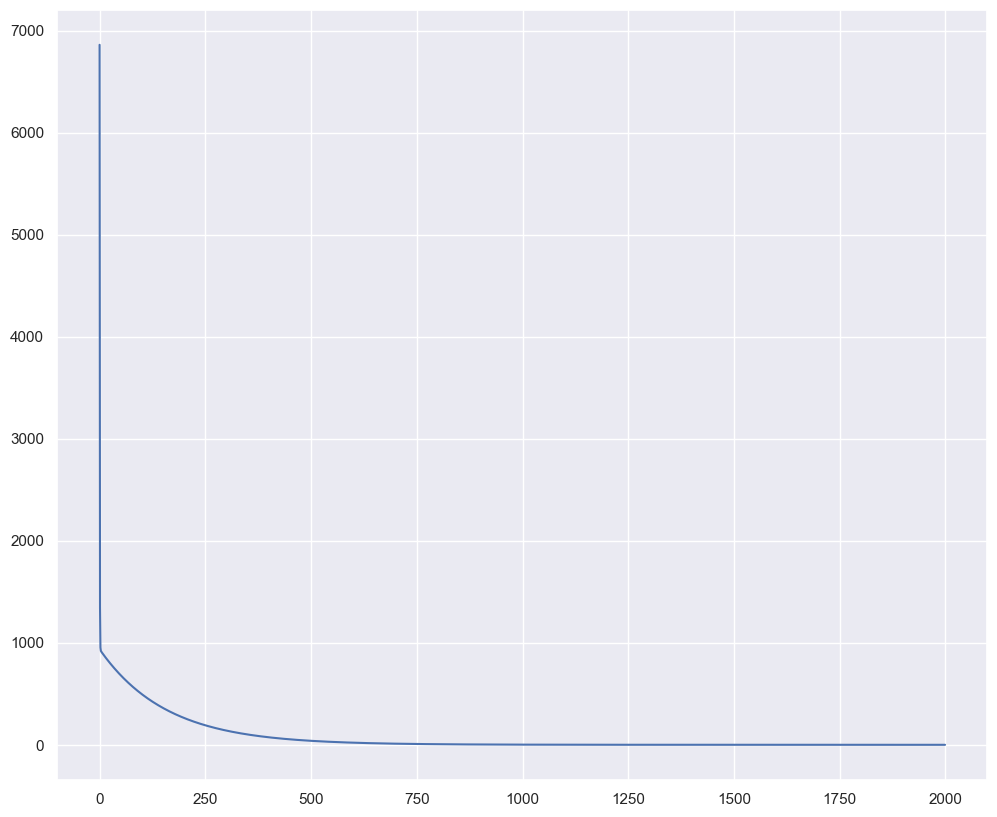

In [35]:
plt.plot(hist.history['loss'])

In [36]:
model.get_weights()

[array([[1.5192151],
        [2.2923489]], dtype=float32),
 array([77.72521], dtype=float32)]

epoch=0, 기울기=99.6571, 절편=9.9143  Cost=1.7354
epoch=100, 기울기=65.3714, 절편=1.3429  Cost=1.7354
epoch=200, 기울기=31.0857, 절편=-7.2286  Cost=1.7354
epoch=300, 기울기=2.0650, 절편=-14.2327  Cost=1.7494
epoch=400, 기울기=2.0706, 절편=-14.3300  Cost=1.7501
epoch=500, 기울기=2.0841, 절편=-14.4248  Cost=1.7499
epoch=600, 기울기=2.0974, 절편=-14.5183  Cost=1.7498
epoch=700, 기울기=2.1105, 절편=-14.6106  Cost=1.7496
epoch=800, 기울기=2.1235, 절편=-14.7017  Cost=1.7494
epoch=900, 기울기=2.1363, 절편=-14.7917  Cost=1.7492
epoch=1000, 기울기=2.1489, 절편=-14.8805  Cost=1.7491


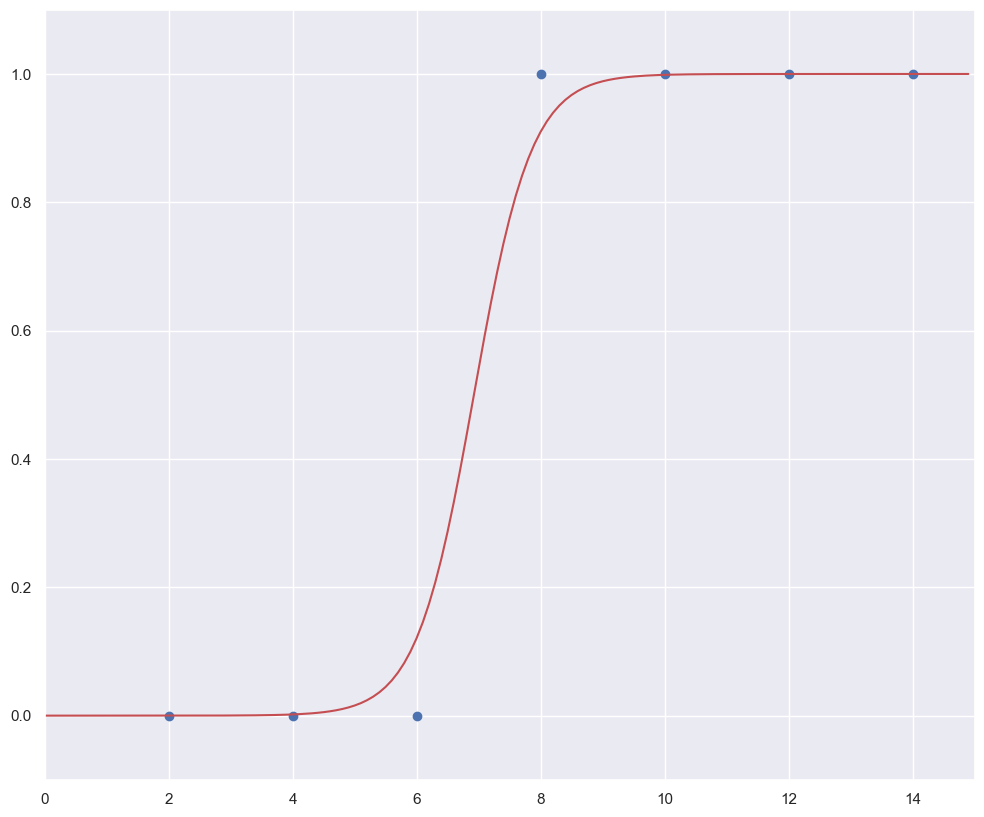

In [37]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]  # shape: (7, )
Y = data[:, 1]  # shape: (7, )

# 임의의 초기값 설정
a, b = 100, 10  # 기울기, 절편
lr = 0.1        # 학습률

#시그모이드 함수를 정의합니다.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # shape: (7, )

# cost 함수 정의
def cost(a, b):  # 실수
    return - (Y * np.log(sigmoid(a * X + b)) +(1 - Y) * np.log(1 - sigmoid(X))).mean()

#경사 하강법을 실행합니다.
for i in range(1001):
    error = sigmoid(a * X + b) - Y  # 편차 : shape: (7, )
    a_diff = 2 * (error * X).mean()   # 실수
    b_diff = 2 * error.mean()         # 실수  
    
    a = a - lr * a_diff     # 실수
    b = b - lr * b_diff     # 실수
    if i % 100 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f  Cost=%.4f" % (i, a, b, cost(a, b)))
    
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(X, Y)   # X: (7, ), Y:(7, )
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
plt.plot(x_range, sigmoid(a * x_range + b),"r")
plt.show()


In [39]:
#################################################################
#  로지스틱 회귀 (Sigmoid) : numpy로 학습
#  - 공부시간과 학습 예제
#################################################################
import numpy as np
import matplotlib.pyplot as plt

#공부시간 X와 성적 Y의 리스트를 만듭니다.
data = np.array([[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]])
X = data[:, 0]
Y = data[:, 1]

# weight와 bias의 초기값 설정
w, b = 1, 2     # 기울기, 절편
lr = 0.1       # 학습률
epoch = 5001    # 학습횟수

# 시그모이드 함수 정의
def sigmoid(w, b, X):
    return 1 / (1 + np.exp(-(w*X + b)))

# cost함수 정의  : Binary Cross Entropy
def cost(h):
    return (- (Y * np.log(h) + (1 - Y) * np.log(1 - h))).mean()

# 경사 하강법 실시
for i in range(epoch):
    error = sigmoid(w, b, X) - Y  # 각 x에서의 오차(편차)
    w_diff = (error * X).mean()     # cost를 w로 미분
    b_diff = error.mean()           # cost를 b로 미분

    # w와 b 업데이트
    w = w - lr * w_diff
    b = b - lr * b_diff
    h = sigmoid(w, b, X)
    
    if i % 200 == 0:
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f  Cost=%.4f" % (i, w, b, cost(h)))


epoch=0, 기울기=0.8293, 절편=1.9574  Cost=2.2652
epoch=200, 기울기=0.2933, 절편=-1.3791  Cost=0.3656
epoch=400, 기울기=0.4888, 절편=-2.9470  Cost=0.2375
epoch=600, 기울기=0.6184, 절편=-3.9380  Cost=0.1870
epoch=800, 기울기=0.7170, 절편=-4.6750  Cost=0.1593
epoch=1000, 기울기=0.7977, 절편=-5.2706  Cost=0.1412
epoch=1200, 기울기=0.8668, 절편=-5.7759  Cost=0.1281
epoch=1400, 기울기=0.9276, 절편=-6.2183  Cost=0.1182
epoch=1600, 기울기=0.9823, 절편=-6.6141  Cost=0.1102
epoch=1800, 기울기=1.0322, 절편=-6.9740  Cost=0.1036
epoch=2000, 기울기=1.0783, 절편=-7.3051  Cost=0.0980
epoch=2200, 기울기=1.1212, 절편=-7.6126  Cost=0.0932
epoch=2400, 기울기=1.1614, 절편=-7.9005  Cost=0.0889
epoch=2600, 기울기=1.1993, 절편=-8.1715  Cost=0.0852
epoch=2800, 기울기=1.2353, 절편=-8.4280  Cost=0.0818
epoch=3000, 기울기=1.2695, 절편=-8.6718  Cost=0.0788
epoch=3200, 기울기=1.3022, 절편=-8.9045  Cost=0.0761
epoch=3400, 기울기=1.3335, 절편=-9.1271  Cost=0.0735
epoch=3600, 기울기=1.3636, 절편=-9.3408  Cost=0.0712
epoch=3800, 기울기=1.3926, 절편=-9.5464  Cost=0.0690
epoch=4000, 기울기=1.4205, 절편=-9.7446  Cost=0.0670


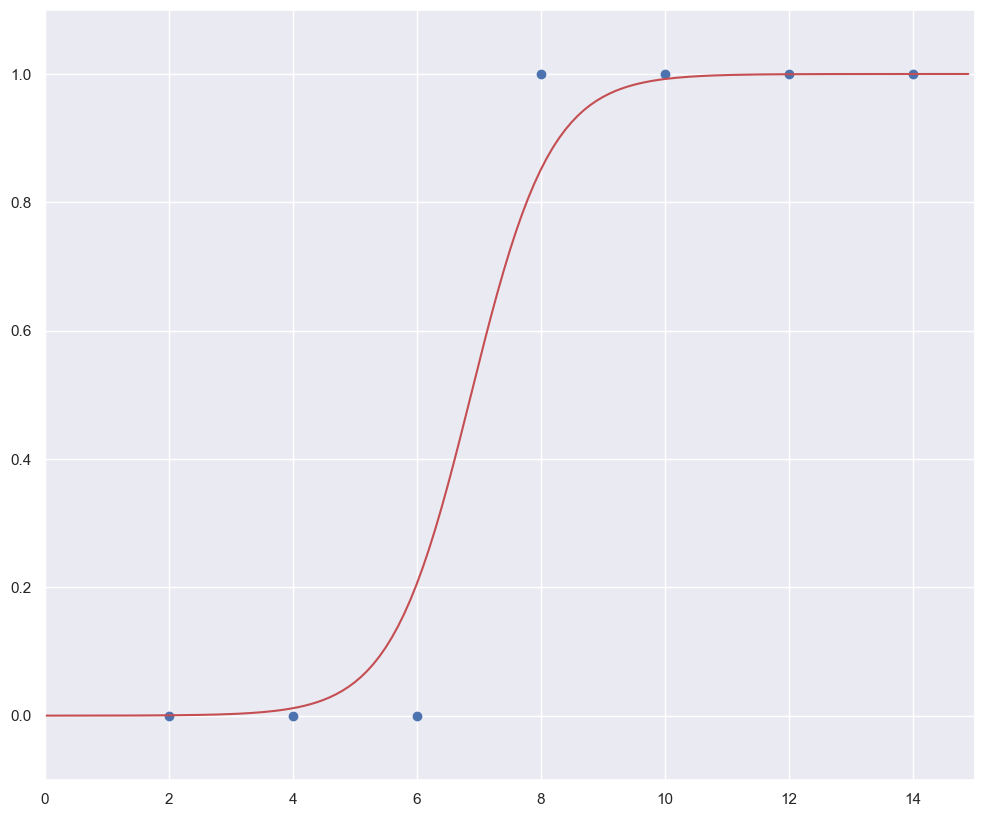

In [40]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(X, Y)   # X: (7, ), Y:(7, )
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위 설정
plt.plot(x_range, sigmoid(w, b, x_range),"r")
plt.show()